In [155]:
import statsmodels.api as sm

import sys
sys.path.append('../src')

from yf_dataset import *
from ta_features import *
from preprocessing import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

In [156]:
ticker = 'amd'
label = 'AMD'
start_date = '2020-01-01'
close_price_period = '1d'
target_pct_change_period = 35 # n = period

In [157]:
amd_df = get_stock_data(ticker, start_date, period=close_price_period)
format_col_names(amd_df)
add_pct_ch_and_future(amd_df, period = target_pct_change_period)
add_sma(amd_df, [14, 20, 50, 100, 200])
add_rsi(amd_df, [14, 20, 50, 100, 200])
add_ema(amd_df, [14, 20, 50, 100, 200])
# TODO: add more features (volume)
# Other models we're about to use will be able to learn non-linear relationships between the features and targets. This includes random forests, gradient boosting, and neural networks.
amd_df.dropna(inplace=True)
amd_df

[*********************100%%**********************]  1 of 1 completed


c:\Users\user\Desktop\FMLProject\FML\notebooks\../src\ta_features.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[str(period) + 'd_close_future_pct'] = df[str(period) + 'd_future_close'].pct_change(period) #calc future % change


,Open,High,Low,Close,Adj_Close,Volume,35d_close_pct,35d_future_close,35d_close_future_pct,sma14,...,rsi14,rsi20,rsi50,rsi100,rsi200,ema14,ema20,ema50,ema100,ema200
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-16,83.540001,83.989998,82.410004,83.169998,83.169998,31474300,-0.007518,94.070000,0.131057,84.102143,...,52.111559,53.205058,55.600776,55.887095,55.623182,83.344025,82.820769,79.513192,72.896489,60.277129
2020-10-19,83.620003,84.650002,81.529999,82.000000,82.000000,36689100,-0.041496,92.919998,0.133171,84.118572,...,49.540085,51.476931,54.885511,55.465600,55.328672,83.164822,82.742601,79.610714,73.076756,60.493277
2020-10-20,82.160004,82.690002,80.580002,81.559998,81.559998,38219400,-0.101960,89.830002,0.101398,84.087857,...,48.569428,50.823449,54.615893,55.307148,55.218169,82.950845,82.629972,79.687156,73.244741,60.702896
2020-10-21,81.720001,81.930000,79.190002,79.199997,79.199997,36426400,-0.140811,91.660004,0.157323,83.683571,...,43.631438,47.424412,53.185948,54.464189,54.630017,82.450732,82.303308,79.668052,73.362667,60.886947
2020-10-22,79.650002,80.820000,78.419998,79.419998,79.419998,38006800,-0.119707,91.650002,0.153991,83.513571,...,44.200962,47.767199,53.302249,54.529447,54.675248,82.046634,82.028707,79.658324,73.482614,61.071355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28,97.940002,104.199997,97.760002,102.760002,102.760002,72542100,-0.069793,119.830002,0.166115,101.232856,...,49.130540,47.565716,48.998043,50.620128,50.764643,100.877195,102.059869,105.538720,104.908701,99.946702
2023-09-29,104.690002,104.940002,102.559998,102.820000,102.820000,56027300,-0.067223,120.620003,0.173118,101.054285,...,49.243217,47.643611,49.025924,50.633374,50.771122,101.136236,102.132262,105.432104,104.867340,99.975292
2023-10-02,102.209999,103.709999,101.699997,103.269997,103.269997,45118600,-0.039974,121.529999,0.176818,100.908570,...,50.135356,48.250562,49.238297,50.733488,50.819907,101.420737,102.240618,105.347315,104.835710,100.008075


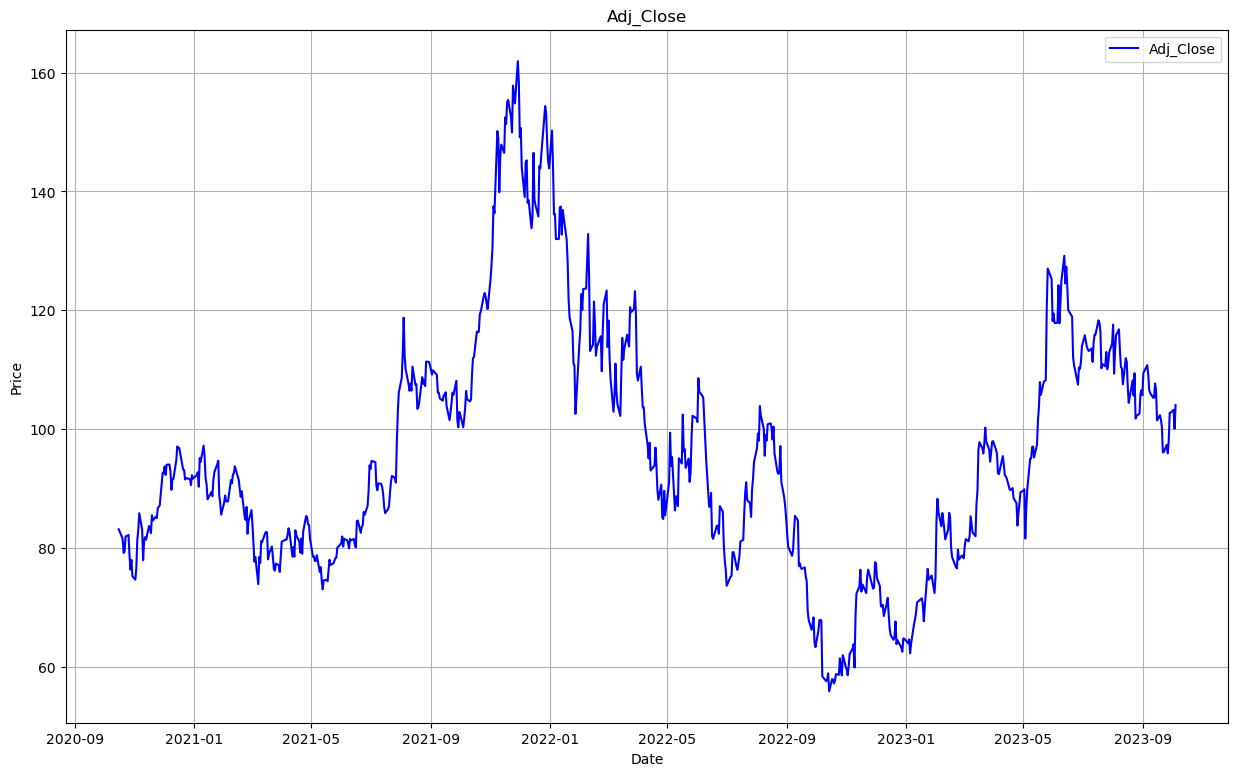

In [158]:
# Plotting
plt.figure(figsize=(15, 9))

# Plot Adj_Close
plt.plot(amd_df['Adj_Close'], label='Adj_Close', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj_Close')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
amd_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', '35d_close_pct',
       '35d_future_close', '35d_close_future_pct', 'sma14', 'sma20', 'sma50',
       'sma100', 'sma200', 'rsi14', 'rsi20', 'rsi50', 'rsi100', 'rsi200',
       'ema14', 'ema20', 'ema50', 'ema100', 'ema200'],
      dtype='object')

In [160]:
features, target = split_features_target(amd_df, f'{target_pct_change_period}d_close_future_pct', [f'{target_pct_change_period}d_future_close',f'{target_pct_change_period}d_close_pct'])

In [161]:
X = amd_df[features]
y = amd_df[target]
X.shape,y.shape

((746, 21), (746,))

In [162]:
scaler = StandardScaler()
# pca = PCA(n_components=20)

X = scaler.fit_transform(X)
# X = pca.fit_transform(X)
X.shape

c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be

(746, 21)

In [163]:
X = sm.add_constant(X)
X

array([[ 1.        , -0.59760254, -0.65370828, ..., -0.86116441,
        -1.3146444 , -2.13220556],
       [ 1.        , -0.59374322, -0.62261274, ..., -0.8557571 ,
        -1.30328747, -2.11698377],
       [ 1.        , -0.66417405, -0.71495652, ..., -0.85151859,
        -1.29270435, -2.10222176],
       ...,
       [ 1.        ,  0.30304426,  0.27538368, ...,  0.57126268,
         0.69754008,  0.66576722],
       [ 1.        ,  0.28326592,  0.25559581, ...,  0.55980946,
         0.69160718,  0.66581762],
       [ 1.        ,  0.22778947,  0.30789259, ...,  0.55748121,
         0.69076942,  0.66866341]])

In [164]:
X_train, y_train, X_test, y_test = train_test_split(0.85, X, y)

In [165]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     35d_close_future_pct   R-squared:                       0.448
Model:                              OLS   Adj. R-squared:                  0.430
Method:                   Least Squares   F-statistic:                     24.88
Date:                  Fri, 24 Nov 2023   Prob (F-statistic):           4.52e-66
Time:                          00:31:39   Log-Likelihood:                 354.46
No. Observations:                   634   AIC:                            -666.9
Df Residuals:                       613   BIC:                            -573.4
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0509      0.011

In [166]:
# plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio for Each Principal Component')
# plt.show()

In [167]:
dependent_variable_name = result.model.endog_names
dependent_variable_name

'35d_close_future_pct'

In [168]:
# Log the experiment with MLflow
with mlflow.start_run():

    # Log parameters
    mlflow.log_param("scaling_method", "StandardScaler" if isinstance(scaler, StandardScaler) else "MinMaxScaler")
    mlflow.log_param("start_date", start_date)
    mlflow.log_param("target_variable", dependent_variable_name)
    mlflow.log_param("features", features)
    # mlflow.log_param("pca_components", pca.n_components_)

    # Log metrics
    rsquared = result.rsquared
    mlflow.log_metric("r-squared", rsquared)

     # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Model info", "Basic OLS model for stock data")

    # Infer the model signature
    signature = infer_signature(X_train, result.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=result,
        artifact_path="ols_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="ols_simple_model",
    )

Registered model 'ols_simple_model' already exists. Creating a new version of this model...
2023/11/24 00:31:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: ols_simple_model, version 2
Created version '2' of model 'ols_simple_model'.


In [169]:
# Make predictions from our model for train and test sets
pred_train = result.predict(X_train)
pred_test = result.predict(X_test)

In [170]:
isinstance

<function isinstance(obj, class_or_tuple, /)>

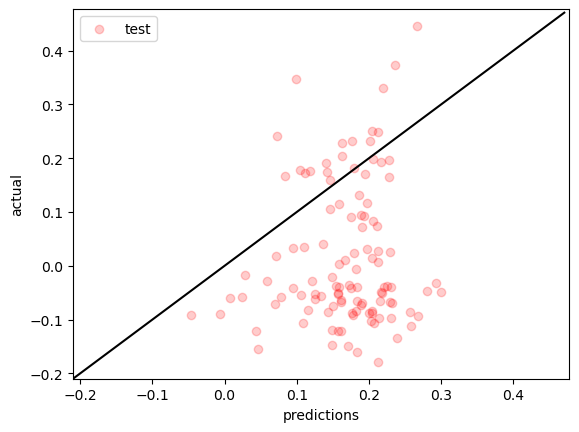

In [179]:
# Scatter the predictions vs the targets with 20% opacity
# plt.scatter(pred_train, y_train, alpha=0.2, color='b', label='train')
plt.scatter(pred_test, y_test, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
perfect_line = np.arange(min(xmin, ymin), max(xmax, ymax), 0.01)
plt.plot(perfect_line, perfect_line, c='k')

# Set the same limits on x and y axes
plt.xlim([min(xmin, ymin), max(xmax, ymax)])
plt.ylim([min(xmin, ymin), max(xmax, ymax)])

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()